# Description

The online presence of restaurants gives them chance to reach more and more customers. Nowadays restaurants want to understand people’s opinions about their food and service. It helps them to know what customers are thinking about their restaurant? Restaurants can quantify the customer opinion and analyze the data you can quantify such information with good accuracy using sentiment analysis.

Traditionally, people take suggestions from acquaintances, friends, and family. But in the 21st-century internet has become one of the most important platforms for seeking advice. On these online platforms, Customer can also share their feedback and view other people’s feedback about restaurant service, food, taste, ambiance, and price. These reviews help customers to make the decision for choosing the restaurant and make a trust because it is based on mouth publicity

# Restaurant Reviews Analysis

We will be dealing with the Restaurant reviews dataset. In this dataset, there are reviews from the customers which are either positive or negative. And now we are going to build a machine learning model using both Support Vector Classifier(SVC) and Count Vectorizer methods. And finally, this model is going to predict whether the given review is either positive or negative.

# Loading Data

In this Project, you will perform text analytics and sentiment analysis on restaurants reviews using Text Classification.

Here, you can use the “Restaurants Reviews” dataset available on Kaggle. The dataset is a tab-separated file. Dataset has two columns Review and Liked.

This data has 2 sentiment labels:

0 — Not liked 1 — Liked

We have to import some basic important libraries before working on the machine learning model.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Next, we have to create a data frame. Download the dataset which was shown previously. And create using pandas.

In [2]:
#import Restaurant Data Set
Restaurant_data=pd.read_csv('Restaurant_Reviews.tsv', sep='\t')
Restaurant_data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [3]:
Restaurant_data.tail()

,Review,Liked
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


value_counts() method gives the number of times the particular value repeated in that column through the data frame.

In [4]:
print(Restaurant_data.Liked.value_counts())

1    500
0    500
Name: Liked, dtype: int64


In [5]:
Restaurant_data['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

In this dataset, we have two columns Review and Liked. Review is the restaurant review and Liked is the sentiment 0 and 1. 1 means the customer has liked the restaurant and 0 means not liked.

# Schema of dataset

View baisc information about rows,columns and datatypes using (.info) method

info() method gives the information about the data frame. I will give the number of columns, column labels, number of non-null entries, the data type of the column, memory usage

In [6]:
Restaurant_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


# Numerical/Statistical analysis of the dataset

It appears that each column contains values of a specific data type for the numeric columns you can view the some statiscal information like mean,standard deviation,minimum/maximum values and number of non-empty values using te (.describe) method

In [7]:
Restaurant_data.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


It will give total count, mean, standard deviation, minimum value, maximum value, 25% of data, 50% of data, 75% of data.

Let’s see the total columns in the Restaurant_data

In [8]:
Restaurant_data = Restaurant_data.drop_duplicates(keep = 'last') #remove all duplicate emails from the dataframe
Restaurant_data

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [9]:
Restaurant_data['Review'][500]

"I also had to taste my Mom's multi-grain pumpkin pancakes with pecan butter and they were amazing, fluffy, and delicious!"

In [10]:
Restaurant_data['Liked'][500]

1

In [11]:
Restaurant_data.columns

Index(['Review', 'Liked'], dtype='object')

nunique() method gives the number of unique values in the particular column

In [12]:
Restaurant_data['Liked'].unique()

array([1, 0], dtype=int64)

unique() method gives unique values in the particular column.

In [13]:
print(Restaurant_data['Liked'].unique())

[1 0]


# Visualization

Lest some visualization using seaborn liberary

Here we used the seaborn library to visualize the data frame. This is a count plot where it counts the entries of the column and plots it.

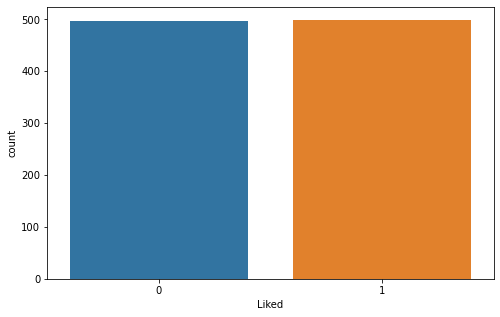

In [14]:
plt.figure(figsize=(8,5))
sns.countplot(x=Restaurant_data.Liked);

# Define X and Y

Here, X is the input feature that we give to the model, and Y is the output that the model should predict. And coming to our dataset, the Review column is the input that we give, and Liked is going to be predicted by the model

In [15]:
x=Restaurant_data['Review'].values
y=Restaurant_data['Liked'].values

# Split the Dataset into Training and Testing Sets

For this, we have to import train_test_split from the scikit learn library. And then whole data frame is divided into four data sets. They are, x_train, x_test, y_train, y_test. Bot x and y are divided into training and test datasets.

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

# View the Shapes of Train Sets and Test Sets

In [17]:
x_train.shape

(747,)

In [18]:
x_test.shape

(249,)

In [19]:
y_train.shape

(747,)

In [20]:
y_test.shape

(249,)

# Import CountVectorizer

from the sci-kit learn library we have to import CountVectorizer. And then store it in a variable something like vect with setting stop_wors as “English”.

This count vectorizer transforms the text into a vector based on the count of the words like the number of times the word is repeated in the sentence.

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer(stop_words='english')

In [22]:
x_train_vect=vect.fit_transform(x_train)
x_test_vect=vect.transform(x_test)

In [23]:
x_train_vect.toarray()    #the text is converted to numerical values

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

# Methode-1

# Import Support Vector Classifier(SVC)

Import Support Vector Classifier(SVC) from Support Vector Machine (SVM) library and assign it to a variable called a model.

In [24]:
from sklearn.svm import SVC
model=SVC()


# Train the Model

The fit method is used to train the model and we have to pass training datasets as arguments in it to train the model.


In [25]:
model.fit(x_train_vect,y_train)

SVC()

# Predict the Test Results

Use predict method to predict the test results. Pass the x variables of the testing dataset in it.

In [26]:
y_pred=model.predict(x_test_vect)

# Evaluate the Model

For machine learning models to evaluate it, we use variable methods and all these are in the metrics library and here for support vector classifier(svc), we use accuracy score to evaluate it.

Import accuracy_score from scikit learn metrics library and then pass two arguments to which we have to compare and evaluate. Here predicted dataset and test dataset are taken to evaluate.

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
accuracy_score(y_pred,y_test)

0.7269076305220884

For my model, the accuracy is 72

# Methode-2

using pipelines pipeline is used to combine multiple estimators/ combine two processes together

SVC + countvectorizer if we use the pipeline we need not transform the values manually, pipelines take care of this

In [29]:
from sklearn.pipeline import make_pipeline 
model2 = make_pipeline(CountVectorizer(),SVC(C=10))

model2.fit(x_train,y_train)
y_pred2 = model2.predict(x_test)
y_pred2

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1], dtype=int64)

In [30]:
accuracy_score(y_pred2,y_test)

0.8514056224899599

# USING NAIVE BAYES

In [31]:
from sklearn.naive_bayes import MultinomialNB
model3 = MultinomialNB(alpha=1)

In [32]:
model3.fit(x_train_vect,y_train)

MultinomialNB(alpha=1)

In [33]:
y_pred3 = model3.predict(x_test_vect)
y_pred3

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1], dtype=int64)

In [34]:
accuracy_score(y_pred3,y_test)

0.7469879518072289

# Methode-4

NB + Countvectorizer pipeline

In [35]:
from sklearn.pipeline import make_pipeline 
model4 = make_pipeline(CountVectorizer(),MultinomialNB(alpha=2))

model4.fit(x_train,y_train)
y_pred4 = model4.predict(x_test)
y_pred4

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1], dtype=int64)

In [36]:
accuracy_score(y_pred4,y_test)

0.7951807228915663

# Save the Model

We can save the model and for that, we have to use joblib. Import joblib and using dump method we can save it. We have to pass two arguments in it. one is the model and the other is the name of our file.

In [37]:
import joblib

In [38]:
joblib.dump(model4,'Project')

['Project']

And again to use it we have to use the load method. We can retrieve it using the load method and save it to a variable.

In [39]:
import joblib
model2=joblib.load('Project')

# Prediction of New Reviews using the Model

Now our model is well trained and ready for implementation. Let us try with some examples.

In [40]:
model2.predict(['hello!!Love Your Food'])


array([1], dtype=int64)

Here the review is a positive review and as expected our model predicted 1 for it which means positive.

Let’s try with a negative review and see what it will predict.

In [41]:
model2.predict(["omg!!it was too spice and i asked you don't add too much "])

array([0], dtype=int64)

As expected it gave 0 as output which means negative.

In [42]:
%%writefile app.py 
import streamlit as st 
import joblib 
st.title("Restaurant Reviews")
model2 = joblib.load('Project')
ip = st.text_input("Enter the Review :")
op = model2.predict([ip])

def main():       
    # front end elements of the web page 
    html_temp = """ 
    <div style ="background-color:yellow;padding:13px"> 
    <h1 style ="color:black;text-align:center;">Streamlit Loan Prediction ML App</h1> 
    </div> 
    """
      
    # display the front end aspect
    st.markdown(html_temp, unsafe_allow_html = True) 
# review = ['Positive','Negative'] #you can add this line extra to print the text as the output
if st.button('PREDICT'):
  st.title(op[0])
    
if __name__=='__main__': 
    main()    


Overwriting app.py


In [ ]:
!streamlit run app.py & npx localtunnel 8501